In [2]:
CONFIG_FILE_NAME = 'sbwatcher.json'
CONFIG_FOLDER_NAME = 'configs'

import os
import json
import datetime

from mysql import connector as connector

import matplotlib.pyplot as plt
#import pandas as pd

dirName, _ = os.path.split(os.path.abspath(''))
config_file_path = dirName + os.path.sep + os.path.sep + CONFIG_FOLDER_NAME + os.path.sep + CONFIG_FILE_NAME

config_file = open(config_file_path, 'r+')
configs = json.load(config_file)
config_file.close()

connect = connector.connect(**configs['mysql'])

In [8]:
start_date = datetime.datetime.strptime('2020.1.1', '%Y.%m.%d')
end_date = datetime.datetime.strptime('2020.10.31', '%Y.%m.%d')

In [9]:
query = """
SELECT buy_price, sell_price, event_ts 
FROM f_rates WHERE fin_id = 1 and event_ts BETWEEN {0} AND {1} ORDER BY event_ts;
""".format(start_date.timestamp(), end_date.timestamp())

#print(datetime.datetime.fromtimestamp(start_date.timestamp()))
#print(datetime.datetime.fromtimestamp(end_date.timestamp()))

cursor = connect.cursor(dictionary=True)
cursor.execute(query) 
rates = cursor.fetchall()
print( datetime.datetime.fromtimestamp(rates[0]['event_ts']) )
print( datetime.datetime.fromtimestamp(rates[-1]['event_ts']) )


2020-01-03 17:49:17
2020-10-23 15:45:05


2020-01-03 17:49:17
2020-10-23 15:45:05


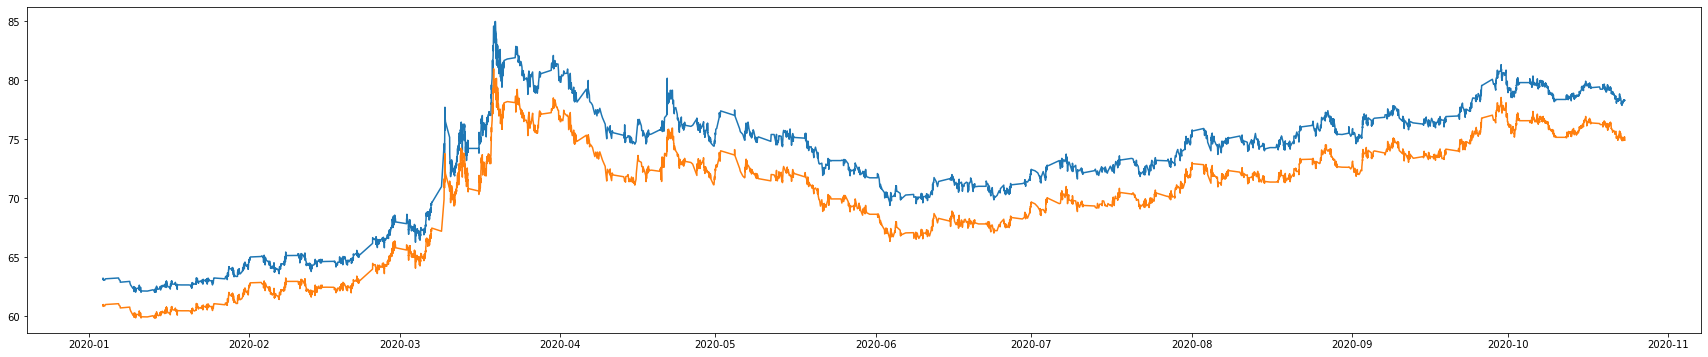

In [10]:
r_range = [datetime.datetime.fromtimestamp(item['event_ts']) for item in rates]

print(r_range[0])
print(r_range[-1])

plt.figure(figsize=(30, 6))
#plt.xticks(rotation = 90)

plt.plot(
    r_range, 
    [item['sell_price'] for item in rates],
    )
plt.plot(
    r_range, 
    [item['buy_price'] for item in rates]
    )
plt.show()